<a href="https://colab.research.google.com/github/YirenShen-07/Yiren-590Assignment5/blob/main/%E2%80%9CAssignment5%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #5
### In this assignment, I used a pre-trained BERT model (textattack/bert-base-uncased-SST-2) for text categorization and generated local interpretations via the SHAP (SHapley Additive exPlanations) tool to help understand the model's predictions for a given text input.
### Yiren Shen

#### Include the button below. Change the link to the location in your github repository:https://github.com/YirenShen-07/Yiren-590Assignment5/blob/main/%E2%80%9CAssignment5%E2%80%9D.ipynb


## Requirement:
Instructions
Generate local explanations for individual predictions from a pre-trained blackbox model (ie ResNet34, Inception, BERT, YOLO, GPT-2). You may use LIME, SHAP, or Anchors for this assignment. At least one visualization of your explanation is required.



Include a discussion that explains why you chose the explanation technique you did. In this discussion, include strengths, limitations, and potential improvements to your approach.

* Notebook is well documented and includes details and references to the dataset and models used
* Code implementing the explanation technique is correct
* Code implementing the explanation technique is clear and well documented
* At least one visualization is used for the explanation
Visualization is clear, follows best practices, and has a clear caption/explanation in the notebook markdown
* Notebook includes markdown cell(s) with a discussion on why you chose this explanation technique, and strengths, limitations, and potential improvements


In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Duke-AI-XAI" # Change to your repo name
git_path = 'https://github.com/AIPI-590-XAI/Duke-AI-XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke-AI-XAI'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 68 (delta 22), reused 49 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 6.59 MiB | 12.76 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Duke-AI-XAI/templates
template.ipynb


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.2 MB/s eta 0:00:00


## Model loading with input text and Interpretation Generation:

*   Pre-trained models were loaded through BERTTokenizer and BERTForSequenceClassification and predictions were generated using the input text “Congratulations to Duke University on its 100th anniversary! Go Blue Devils!” to generate predictions.
*   The model predictions are interpreted using SHAP's Explainer, which outputs textually interpreted SHAP values.




In [ ]:
import torch
import torchvision
from torchvision import transforms
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from PIL import Image

In [ ]:
# Loading the BERT model
tokenizer = BertTokenizer.from_pretrained('textattack/bert-base-uncased-SST-2')
model = BertForSequenceClassification.from_pretrained('textattack/bert-base-uncased-SST-2')

# Select a text input
text = "Congratulations to Duke University on its 100th anniversary! Go Blue Devils!"

# Define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=128, truncation=True) for v in x])
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (outputs[:, 1] - outputs[:, 0]).flatten()
    return scores

# Creating an explainer
explainer = shap.Explainer(f, tokenizer)
shap_values = explainer([text])
print(shap_values)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:59, 119.36s/it]              

.values =
array([[-4.47034836e-08,  5.66684455e-02,  1.40529871e-02,
         2.71421671e-02,  4.94247004e-02, -4.58338112e-03,
         5.14513552e-02,  5.57957664e-02,  3.99611890e-04,
        -5.26269078e-02, -2.95566991e-02,  5.70373461e-02,
        -8.34555924e-03, -6.01749718e-02,  5.96046448e-08]])

.base_values =
array([-1.86254644])

.data =
(array(['', ' congratulations', ' to', ' duke', ' university', ' on',
       ' its', ' 100th', ' anniversary', ' !', ' go', ' blue', ' devils',
       ' !', ''], dtype=object),)


#### **SHAP interpreter output:**
This output shows the results of using SHAP to locally interpret the input sentence “Congratulations to Duke University on its 100th anniversary! SHAP values reveal how each word affects the model's sentiment prediction.

*   The base value is -1.86254644, indicating that the model's predictions when there is no input are skewed toward negative sentiment
*   'congratulations' contributes 5.66684455e-02 to the prediction, which is a positive contribution, meaning it pushes the model's prediction toward positive sentiment
* .data: this is the input data, in this case a disambiguation representation of the text provided, where each string corresponds to a word or word piece in the text, e.g. ['', ' congratulations', ' to', ' duke', ...]




## Visualizations:
 SHAP values are displayed through three visualizations.


*   Text Interpretation Plot
*   Decision Plot
*   Waterfall Plot

Intuitive visualizations can show the impact of input features on model decisions and help understand the behavior of black box models.



### Text Interpretation Plot

Text Interpretation Map: shows the impact of each word on the final sentiment prediction, with red indicating a positive contribution and blue indicating a negative contribution.

In [ ]:
# Text visualization
plt.figure(figsize=(20, 3))
shap.plots.text(shap_values[0])
plt.tight_layout()
plt.show()

<Figure size 2000x300 with 0 Axes>

**Output:**

The red and blue arrows in the figure indicate the effect of each word on the model's prediction.

*   Red: words contribute positively to the final predicted value of the model, pushing the model to output larger predicted values.
*   Blue: words contribute negatively to the model's final prediction, pushing the model to output smaller predictions.


*   Because the predicted value is negative (close to -1.70586) and the baseline value indicates that the model tends to favor negative sentiments in the absence of inputs, the model predicts that the sentiments of the input text are negative sentiments, even though there are some positive words that contribute somewhat positively to the results (e.g., “congratulations “).






### Decision Plot

Decision Plot shows the gradual cumulative impact of the features (words) on the prediction, illustrating how the model arrived at the final prediction.

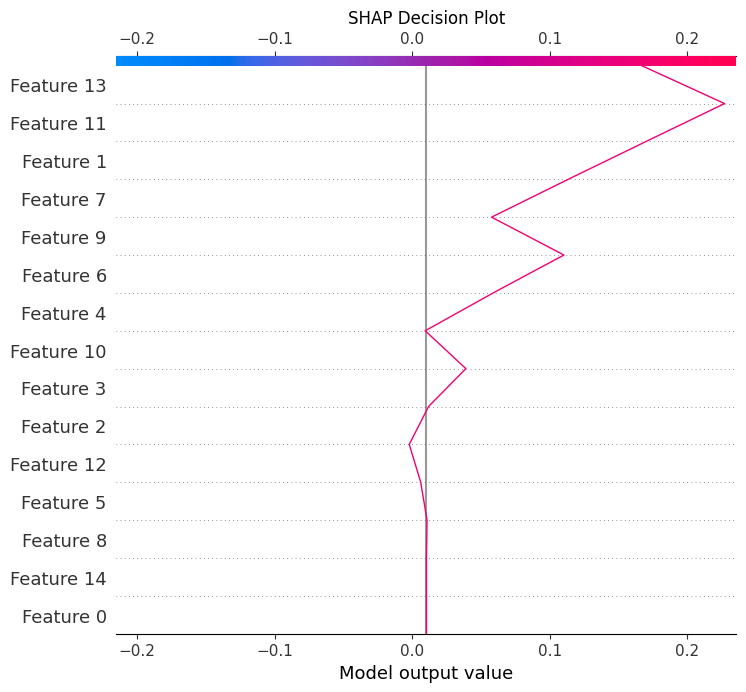

<Figure size 640x480 with 0 Axes>

In [ ]:
# Decision Plot Visualization
plt.figure(figsize=(15, 10))
plt.title("SHAP Decision Plot")
# Use the mean value of shap_values as expected_value
expected_value = np.mean(shap_values.values)
# Get the actual feature name
feature_names = shap_values.feature_names
# Make sure the length of feature_names matches shap_values
if len(feature_names) != shap_values.values.shape[1]:
    feature_names = [f"Feature {i}" for i in range(shap_values.values.shape[1])]
shap.decision_plot(expected_value, shap_values.values[0], feature_names=feature_names)
plt.tight_layout()
plt.show()

**Output:**


*   From the figure, we can see that some features have large changes (e.g., Feature 13 and Feature 11), which have a large positive impact on the final predictions of the model, driving the model predictions to increase.
*   While some other features, such as Feature 5 and Feature 8, have a negative impact on the model output, making the model predictions lower




### Waterfall Plot

Waterfall diagram shows in detail the gradual influence of words on the model output through the accumulation of feature contributions, visualizing the transition of the model from the baseline value to the final predicted value.

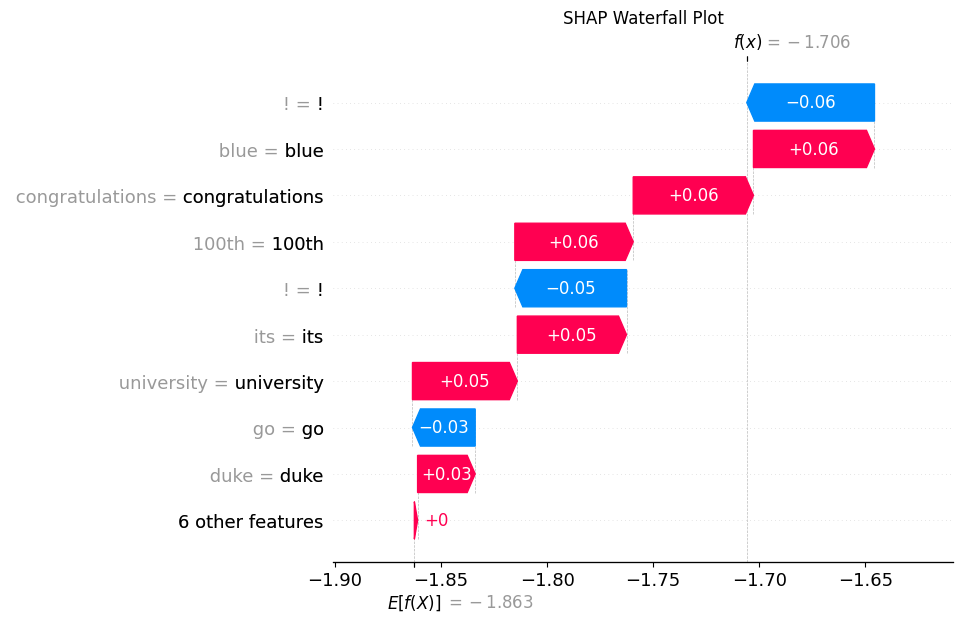

<Figure size 640x480 with 0 Axes>

In [ ]:
# Waterfall Chart Visualization
plt.figure(figsize=(10, 6))
plt.title("SHAP Waterfall Plot")
shap.plots.waterfall(shap_values[0])
plt.tight_layout()
plt.show()

**Output:**

*   Red bar: indicates that this feature pushes the model predictions toward positive sentiment (i.e., increases the predicted value).” congratulations” and ‘blue’ each have a positive contribution (+0.06), pushing the predicted results more towards positive sentiment.
*   Blue bar: indicates that this feature pushes the model predictions towards negative sentiment (i.e., decreases the predicted value).” ！” and ‘go’, on the other hand, have negative contributions (-0.05 and -0.03), skewing the model's predictions more toward negative sentiment.

*   The final forecast is still negative sentiment (f(x) = -1.706), but slightly more optimistic than the benchmark value of -1.863.







## Summary:
The baseline value of the model is -1.8625, which means that the default prediction of the model is biased towards negative sentiment without any inputs. The graph clearly shows how each word in the input text progressively affects the model's predicted value, starting from the baseline value. After accumulating positive and negative contributions, the model arrives at a final prediction of -1.70586. Although still a negative sentiment, it is slightly more optimistic than the baseline value, indicating that some words in the input features improve the model's sentiment score.


## Reference

1. AIPI-590-XAI. “Duke-Ai-Xai/Explainable-Ml-Example-Notebooks/Local_explanations.Ipynb at Main · AIPI-590-Xai/Duke-Ai-Xai.” GitHub,  https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/local_explanations.ipynb Accessed 2 Oct. 2024.
2. Chatgpt. Explanation of Python code for models